In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
%matplotlib inline

In [112]:
df = pd.read_parquet("data.parquet")
df

,U,Y
0,[-3.754357411597768e-08],[-6.727003626622975e-09]
1,[1.073375175424575e-07],[1.3566268282163091e-09]
2,[-3.8989672649920554e-08],[2.8481817534999358e-08]
3,[-1.099582767712876e-08],[1.9898456062271613e-08]
4,[-1.3139716340971048e-07],[-3.1634177629829285e-08]
...,...,...
7995,[-3.649722715560402e-08],[1.4747087351037801e-08]
7996,[-1.0448833209794925e-07],[-1.6483016107234253e-08]
7997,[5.846823693835824e-08],[-4.261941585575393e-08]
7998,[-6.786219436132801e-08],[-2.3595336948461002e-08]


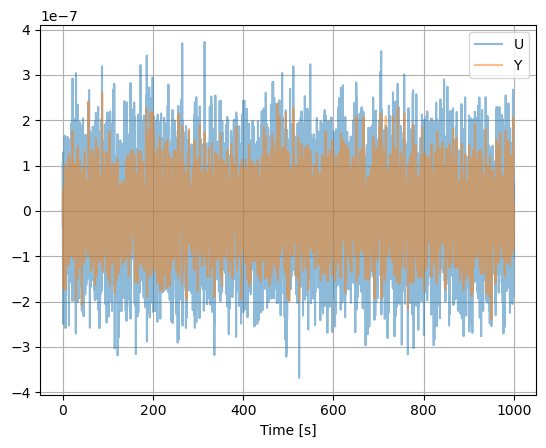

In [113]:
t = 1e3*np.arange(df.shape[0])/8000
u = np.vstack(df["U"])
y = np.vstack(df["Y"])
fig,ax = plt.subplots()
ax.plot(t,u,alpha=0.5,label="U")
ax.plot(t,y,alpha=0.5,label="Y")
ax.grid()
ax.set_xlabel('Time [s]')
ax.legend()

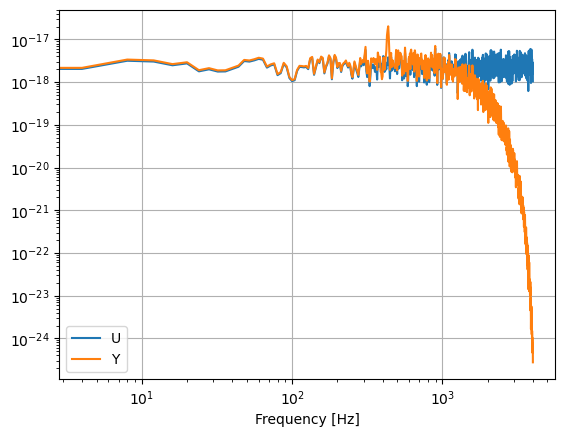

In [122]:
nu,psd_u = welch(u.flatten(),fs=8000, nperseg=1000*2)
nu,psd_y = welch(y.flatten(),fs=8000, nperseg=1000*2)
fig,ax = plt.subplots()
ax.loglog(nu,psd_u,label="U")
ax.loglog(nu,psd_y,label="Y")
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.legend()

(-20.0, 10.0)

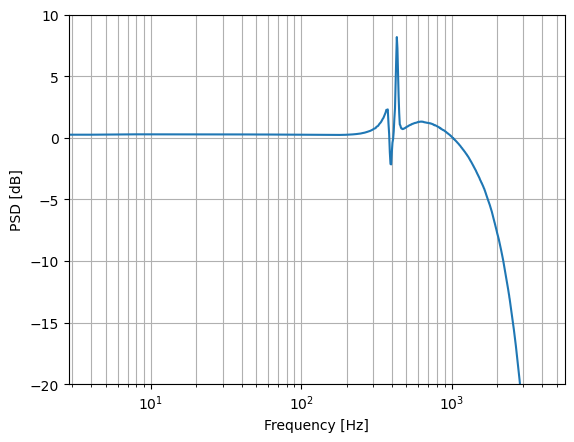

In [123]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u))
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_ylim([-20,10])

In [116]:
nu[1]

4.0

In [117]:
8000/2000

4.0